# PROBLEM 1


u == energy density

$Y =\frac{4πG}{3c^2}$

Eq1: $\frac{a''}{a}$ = -Y[u + 3P]

Eq2: $(\frac{a'}{a})^2 = 2Yu - \frac{kc^2}{a^2}$

using Eq2  we multiply both sides by $a^2$  then take the derivative with respect to t

Eq2: $2a'a'' = 2Y[u'a^2 + 2aa'u]$

Now we divide both sides by 2aa' to get

Eq2: $\frac{a''}{a} = Y[u\frac{a}{a'} +2u]$

We can now substitute the right hand of Eq1 into the left hand of Eq2 directly and divide by Y

$u'\frac{a}{a'} + 2u = -u - 3P$

With a little bit of algebra...

$3\frac{a'}{a}[u + P] + u' = 0$





 # PROBLEM 2
 
 R = Radiation Omega Naught
 M = Matter Omega Naught
 A = Lambda Omega Naught

$(\frac{H(z)}{H_0})^2 =  (R(1+z)^4 + M(1+z)^3 + A + ((1-(R+M+A))(1+z)^2))$

doing algebra...

$H(z) = H_0\sqrt{(R(1+z)^4 + M(1+z)^3 + A + ((1-(R+M+A))(1+z)^2))}$

$ Distance_comoving = c\int^{z*}_{0}\frac{dz}{H(z)}$

finding lookback time...

$H(z) = \frac{a'}{a}$

$a = \frac{1}{1+z}$





$\frac{-dz}{dt(1+z)} = H(z)$

put dt on other side and move right hand to left hand denominator, use negative to flip time integration bounds

$\int^{10}_{0}\frac{dz}{(1+z)H(z)} = \int^{t_p}_{t*} dt$

$Lookback time = \int^{10}_{0}\frac{dz}{(1+z)H(z)}$







universe 1 comoving distance
Universe 1 is 0.3 for M and 0.7 for A and 0.0 for R


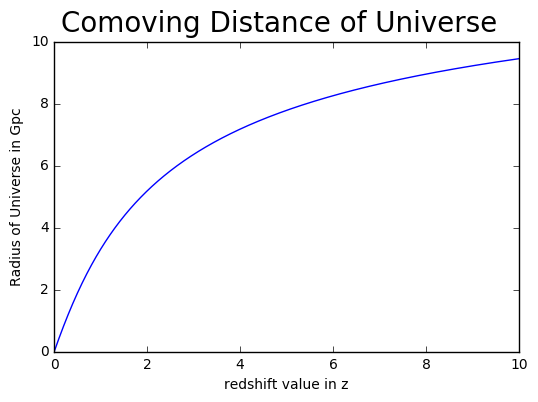


-------------------------------------------------------------
used for problem #3.
This gives the lookback time for our currently predicted model of universe 1  from z = 0 to z = 10

Universe 1 Time = 13.477669951781548 Gyr
-------------------------------------------------------------

universe 1 lookback time
Universe 1 is 0.3 for M and 0.7 for A and 0.0 for R


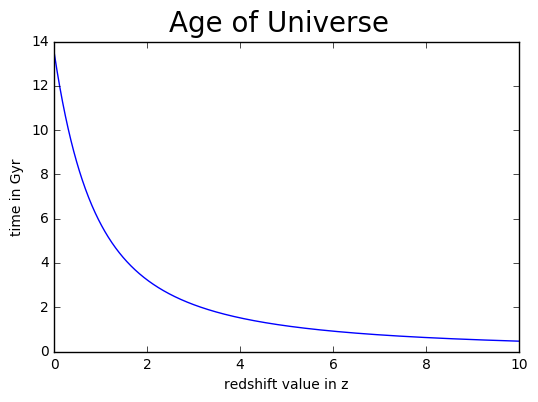

universe 2 comoving distance
Universe 2 is 10.0 for M and 0.0 for A and 0.0 for R


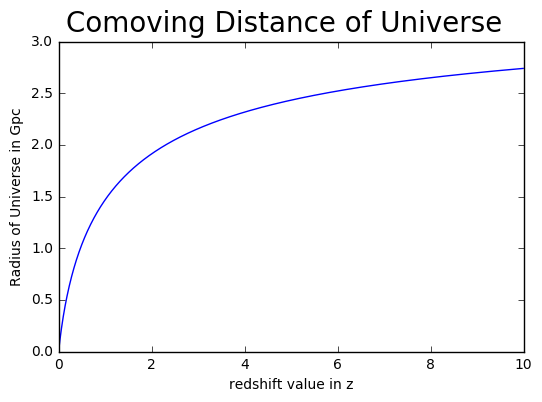


-------------------------------------------------------------
This gives the lookback time for our currently predicted model of universe 2  from z = 0 to z = 10

Universe 2 Time = 4.913791165322198 Gyr
-------------------------------------------------------------

universe 2 lookback time
Universe 2 is 10.0 for M and 0.0 for A and 0.0 for R


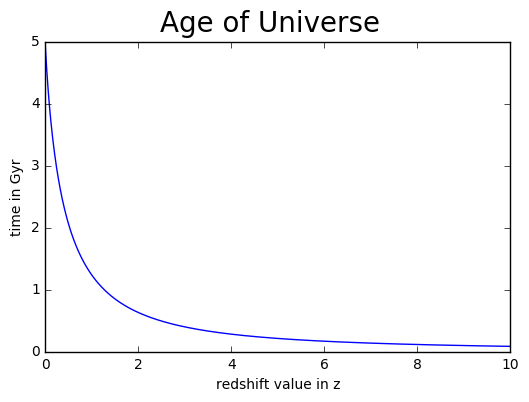

In [35]:
# PROBLEM 2


# R = Radiation Omega Naught
# M = Matter Omega Naught
# A = Lambda Omega Naught
# lookback_time = time_present - time_past|| aka 'how much time ago'

note = [ 'Universe 1 is 0.3 for M and 0.7 for A and 0.0 for R' , 'Universe 2 is 10.0 for M and 0.0 for A and 0.0 for R']

for x in range (0,2):
    R = [0 , 0]
    M = [.3 , 10.0]
    A = [.7 , 0]
    c = 3.0*10**8

    input_cat = []
    output_cat = []
    import matplotlib.pyplot as plt
    from scipy.integrate import quad
    import math 

    # COMOVING DISTANCE --------------------------------------------------------------------

    def comovefunc(z):
        H_naught = 2.2685*10**(-18)    # in 1/sec units
        H_z = (H_naught)*((R[x]*(1+z)**4 + M[x]*(1+z)**3 + A[x] + ((1-(R[x]+M[x]+A[x]))*(1+z)**2))**(0.5))
        comove = c/H_z
        comove = comove * 3.24077929 * 10 ** -26   # meters to Gpc
        return comove 

    for upper_limit in range(0 , 1000): 
        upper_limit = upper_limit/100.0
        output , error = quad(comovefunc, 0 , upper_limit)
        output_cat.append(output)
        input_cat.append(upper_limit)
    
    print('universe',x+1, 'comoving distance')
    print(note[x])
    fig = plt.figure()
    fig.suptitle('Comoving Distance of Universe' , fontsize = 20)
    plt.xlabel('redshift value in z')
    plt.ylabel('Radius of Universe in Gpc')
    plt.plot(input_cat, output_cat)

    plt.show()

    # LOOKBACK TIME --------------------------------------------------------------------------
    input_cat = []
    output_cat = []

    def timefunc(z):
        H_naught = 7.1533 * 10 **(-2)     # in 1/Gyr units
        H_z = (H_naught)*((R[x]*(1+z)**4 + M[x]*(1+z)**3 + A[x] + ((1-(R[x]+M[x]+A[x]))*(1+z)**2))**(0.5))
        lookback_time = 1/(H_z * (1+z))
        return lookback_time 
    
    # this is also used for finding time of universe 1 used in problem#3
    total_age , error = quad(timefunc , 0 , 10000)
    print('')
    print('-------------------------------------------------------------')
    if x ==0:
        print('used for problem #3.')
    print('This gives the lookback time for our currently predicted model of universe',x+1,' from z = 0 to z = 10')
    print('')
    print('Universe',x+1, 'Time =', total_age, 'Gyr')
    print('-------------------------------------------------------------')
    print('')
    
    for upper_limit in range(0 , 1000): 
        upper_limit = upper_limit/100.0
        output , error = quad(timefunc, 0 , upper_limit)
        age_universe = total_age - output  #total age of universe - lookback time
        output_cat.append(age_universe)
        input_cat.append(upper_limit)

    print('universe',x+1, 'lookback time')
    print(note[x])
    fig = plt.figure()
    fig.suptitle('Age of Universe', fontsize = 20)
    plt.xlabel('redshift value in z')
    plt.ylabel('time in Gyr')
    plt.plot(input_cat, output_cat)
    
    

    plt.show()






In [30]:
# PROBLEM 3


# R = Radiation Omega Naught
# M = Matter Omega Naught
# A = Lambda Omega Naught
# lookback_time = time_present - time_past|| aka 'how much time ago'


norm_time = 13.47768642654479    #found in previous problem, in terms of Gyr

for x in range (0,100000):
    x = x/100000.0
    R = x
    M = 0
    A = 0

    input_cat = []
    output_cat = []
    import matplotlib.pyplot as plt
    from scipy.integrate import quad
    import math 
   

    def timefunc(z):
        H_naught = 7.1533 * 10 **(-2)     # in 1/Gyr units
        H_z = (H_naught)*((R*(1+z)**4 + M*(1+z)**3 + A + ((1-(R+M+A))*(1+z)**2))**(0.5))
        lookback_time = 1/(H_z * (1+z))
        return lookback_time 

    
    time_rad, error = quad(timefunc, 0 , 10000)
   
    if time_rad < norm_time:
        print(time_rad , x)
        print('')
        print('Omega Radiation =' , x)
        break
    

13.477097309618573 0.00139

Omega Radiation = 0.00139


In [2]:
for x in range (0,2):
    R = [0 , 0]
    M = [1 , 10.0]
    A = [0 , 0]
    c = 3.0*10**8

    input_cat = []
    output_cat = []
    import matplotlib.pyplot as plt
    from scipy.integrate import quad
    import math 

    # COMOVING DISTANCE --------------------------------------------------------------------

    def comovefunc(z):
        H_naught = 2.2685*10**(-18)    # in 1/sec units
        H_z = (H_naught)*((R[x]*(1+z)**4 + M[x]*(1+z)**3 + A[x] + ((1-(R[x]+M[x]+A[x]))*(1+z)**2))**(0.5))
        comove = c/H_z
        comove = comove * 3.24077929 * 10 ** -26   # meters to Gpc
        comove = comove / (1 + z)
        return comove 


    output , error = quad(comovefunc, 0 , 0.5)
    print(output)
        

1.3019373889786885
0.8775836300131181
